In [8]:
import matplotlib.pyplot as plt
import sklearn 
import numpy as np
%matplotlib inline
from sklearn.datasets import make_moons, make_classification
from sklearn.svm import LinearSVC


In [9]:
# This function is the only styling that we're going to do
#
# Given an 2D range, it will evaluate the SVM on the whole
# range to produce a colored plot which shows you the 
# scoring/probabilities.
def plot_colors(ax, predict_fun, xrange=(-3,3.5), yrange=(-3,3)):
    # store current ax limits so we can reset them later
    xl,yl = ax.get_xlim(),ax.get_ylim()
    
    # generate a grid to plot on
    x0x0, x1x1 = np.meshgrid(np.arange(min(xrange), max(xrange), .01),np.arange(min(yrange), max(yrange), .01))
    Z          = predict_fun(np.c_[x0x0.ravel(),x1x1.ravel()])#[:,1].T
    Z          = Z.reshape(x0x0.shape)
    cf         = ax.contourf(x0x0, x1x1, Z, cmap=plt.cm.Blues_r, alpha=.5);
    
    ax.set(xlim = xl,ylim=yl)
    return ax

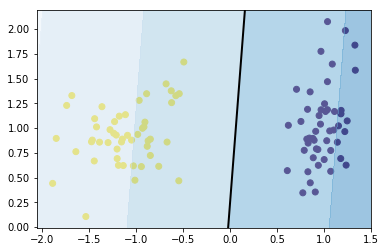

In [20]:

fig,ax = plt.subplots(1,1)

# create and plot the data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
ax.scatter(X[:,0],X[:,1],c=y);

# run the SVM
#  - C  is a parameter used to trade-off complexity (1/lambda regularization parameter),
#       you will want to tune it using GridSearch or similar
#  - dual is needed to tell sklearn that we want to operate in the primal space
clf = LinearSVC(dual=False, C=1)
clf.fit(X, y)

# plot the distances to the plane
plot_colors(ax, clf.decision_function);

# plot the actual SVM decision line
x2 = np.arange(-0.2,2.2,.1)
x1 = (- clf.intercept_ - clf.coef_[0,1]*x2)/clf.coef_[0,0]
ax.plot(x1,x2,color="black",linewidth=2,label="w_0 + w_1 x_1 + w_2 x_2 = 0");

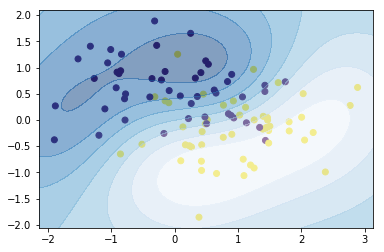

In [37]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC

fig,ax = plt.subplots(1,1)

# create and plot the data
X, y = make_moons(random_state=1, noise=0.5)
ax.scatter(X[:,0],X[:,1],c=y);

# run the SVM
#  - dual=False is needed to tell sklearn that we want to operate in the primal space
clf = SVC(kernel="rbf", C=1.0 , gamma = "auto")
clf.fit(X, y)

# plot the distances to the plane
plot_colors(ax, clf.decision_function);